In [111]:
import pandas as pd

heart = pd.read_csv ('heart.csv')
print (df)
heart.describe()
heart.size
heart.info()

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  

In [113]:
#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

<AxesSubplot:>

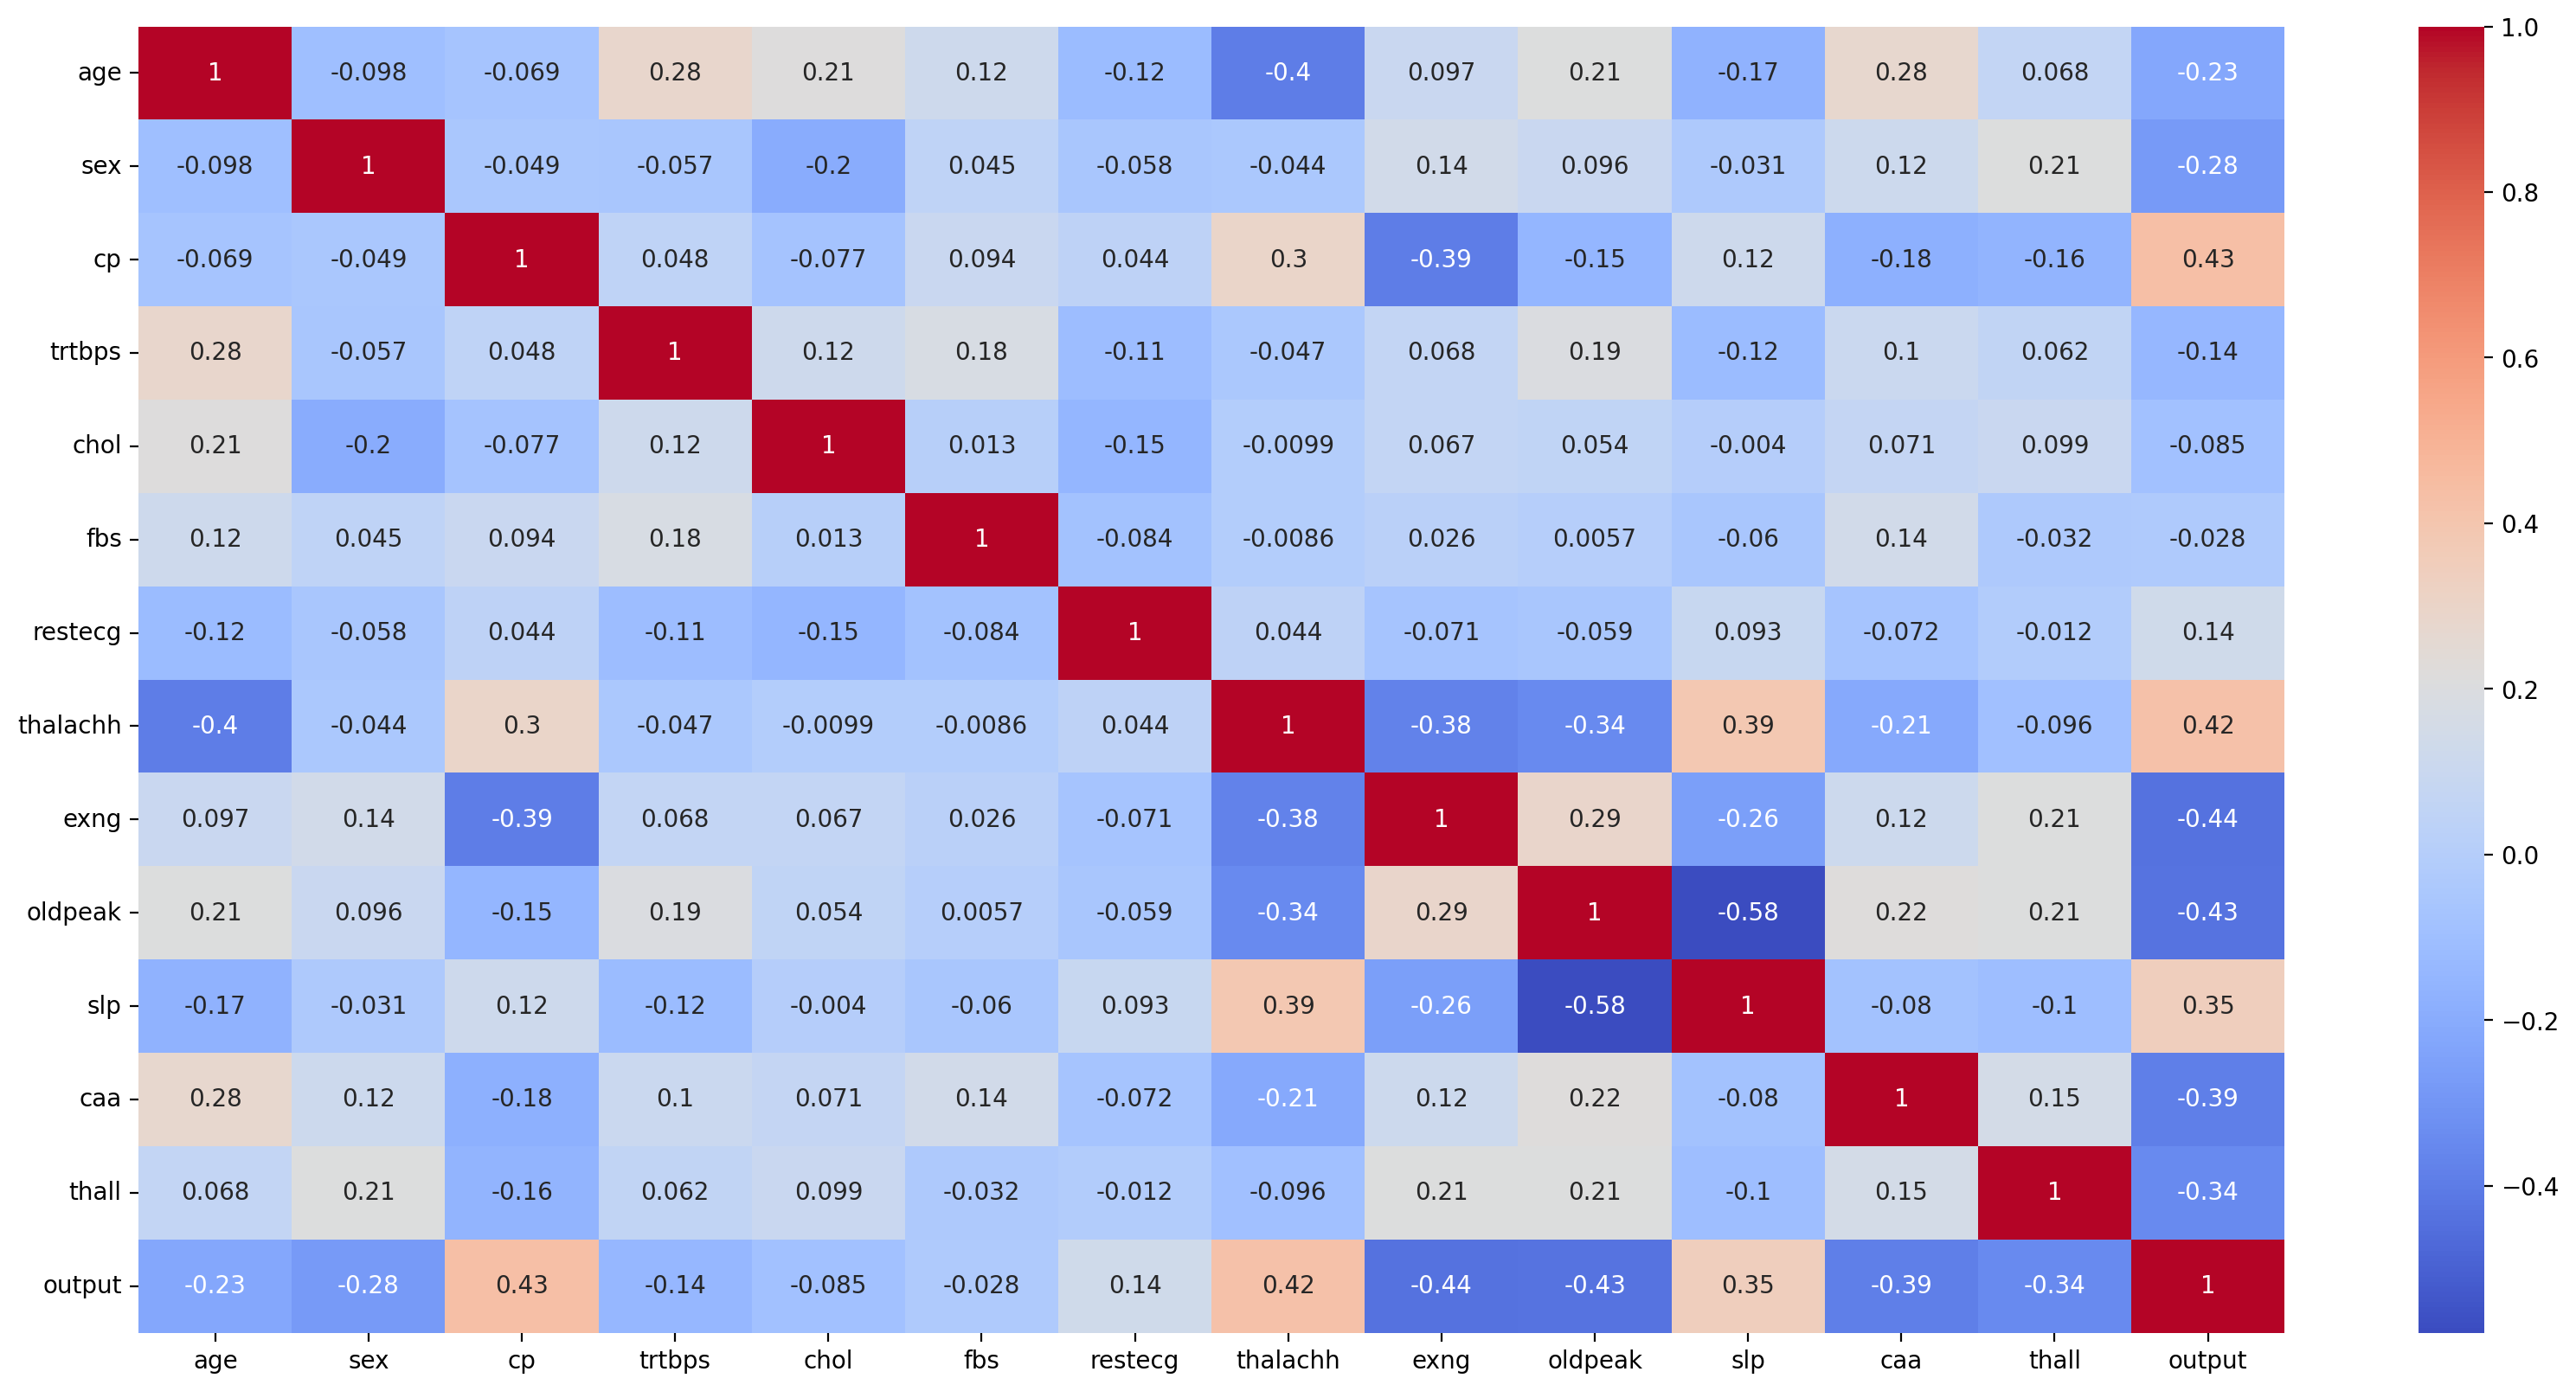

In [95]:
plt.figure(figsize=(20,10), dpi = 200)
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm')

<Figure size 4000x4000 with 0 Axes>

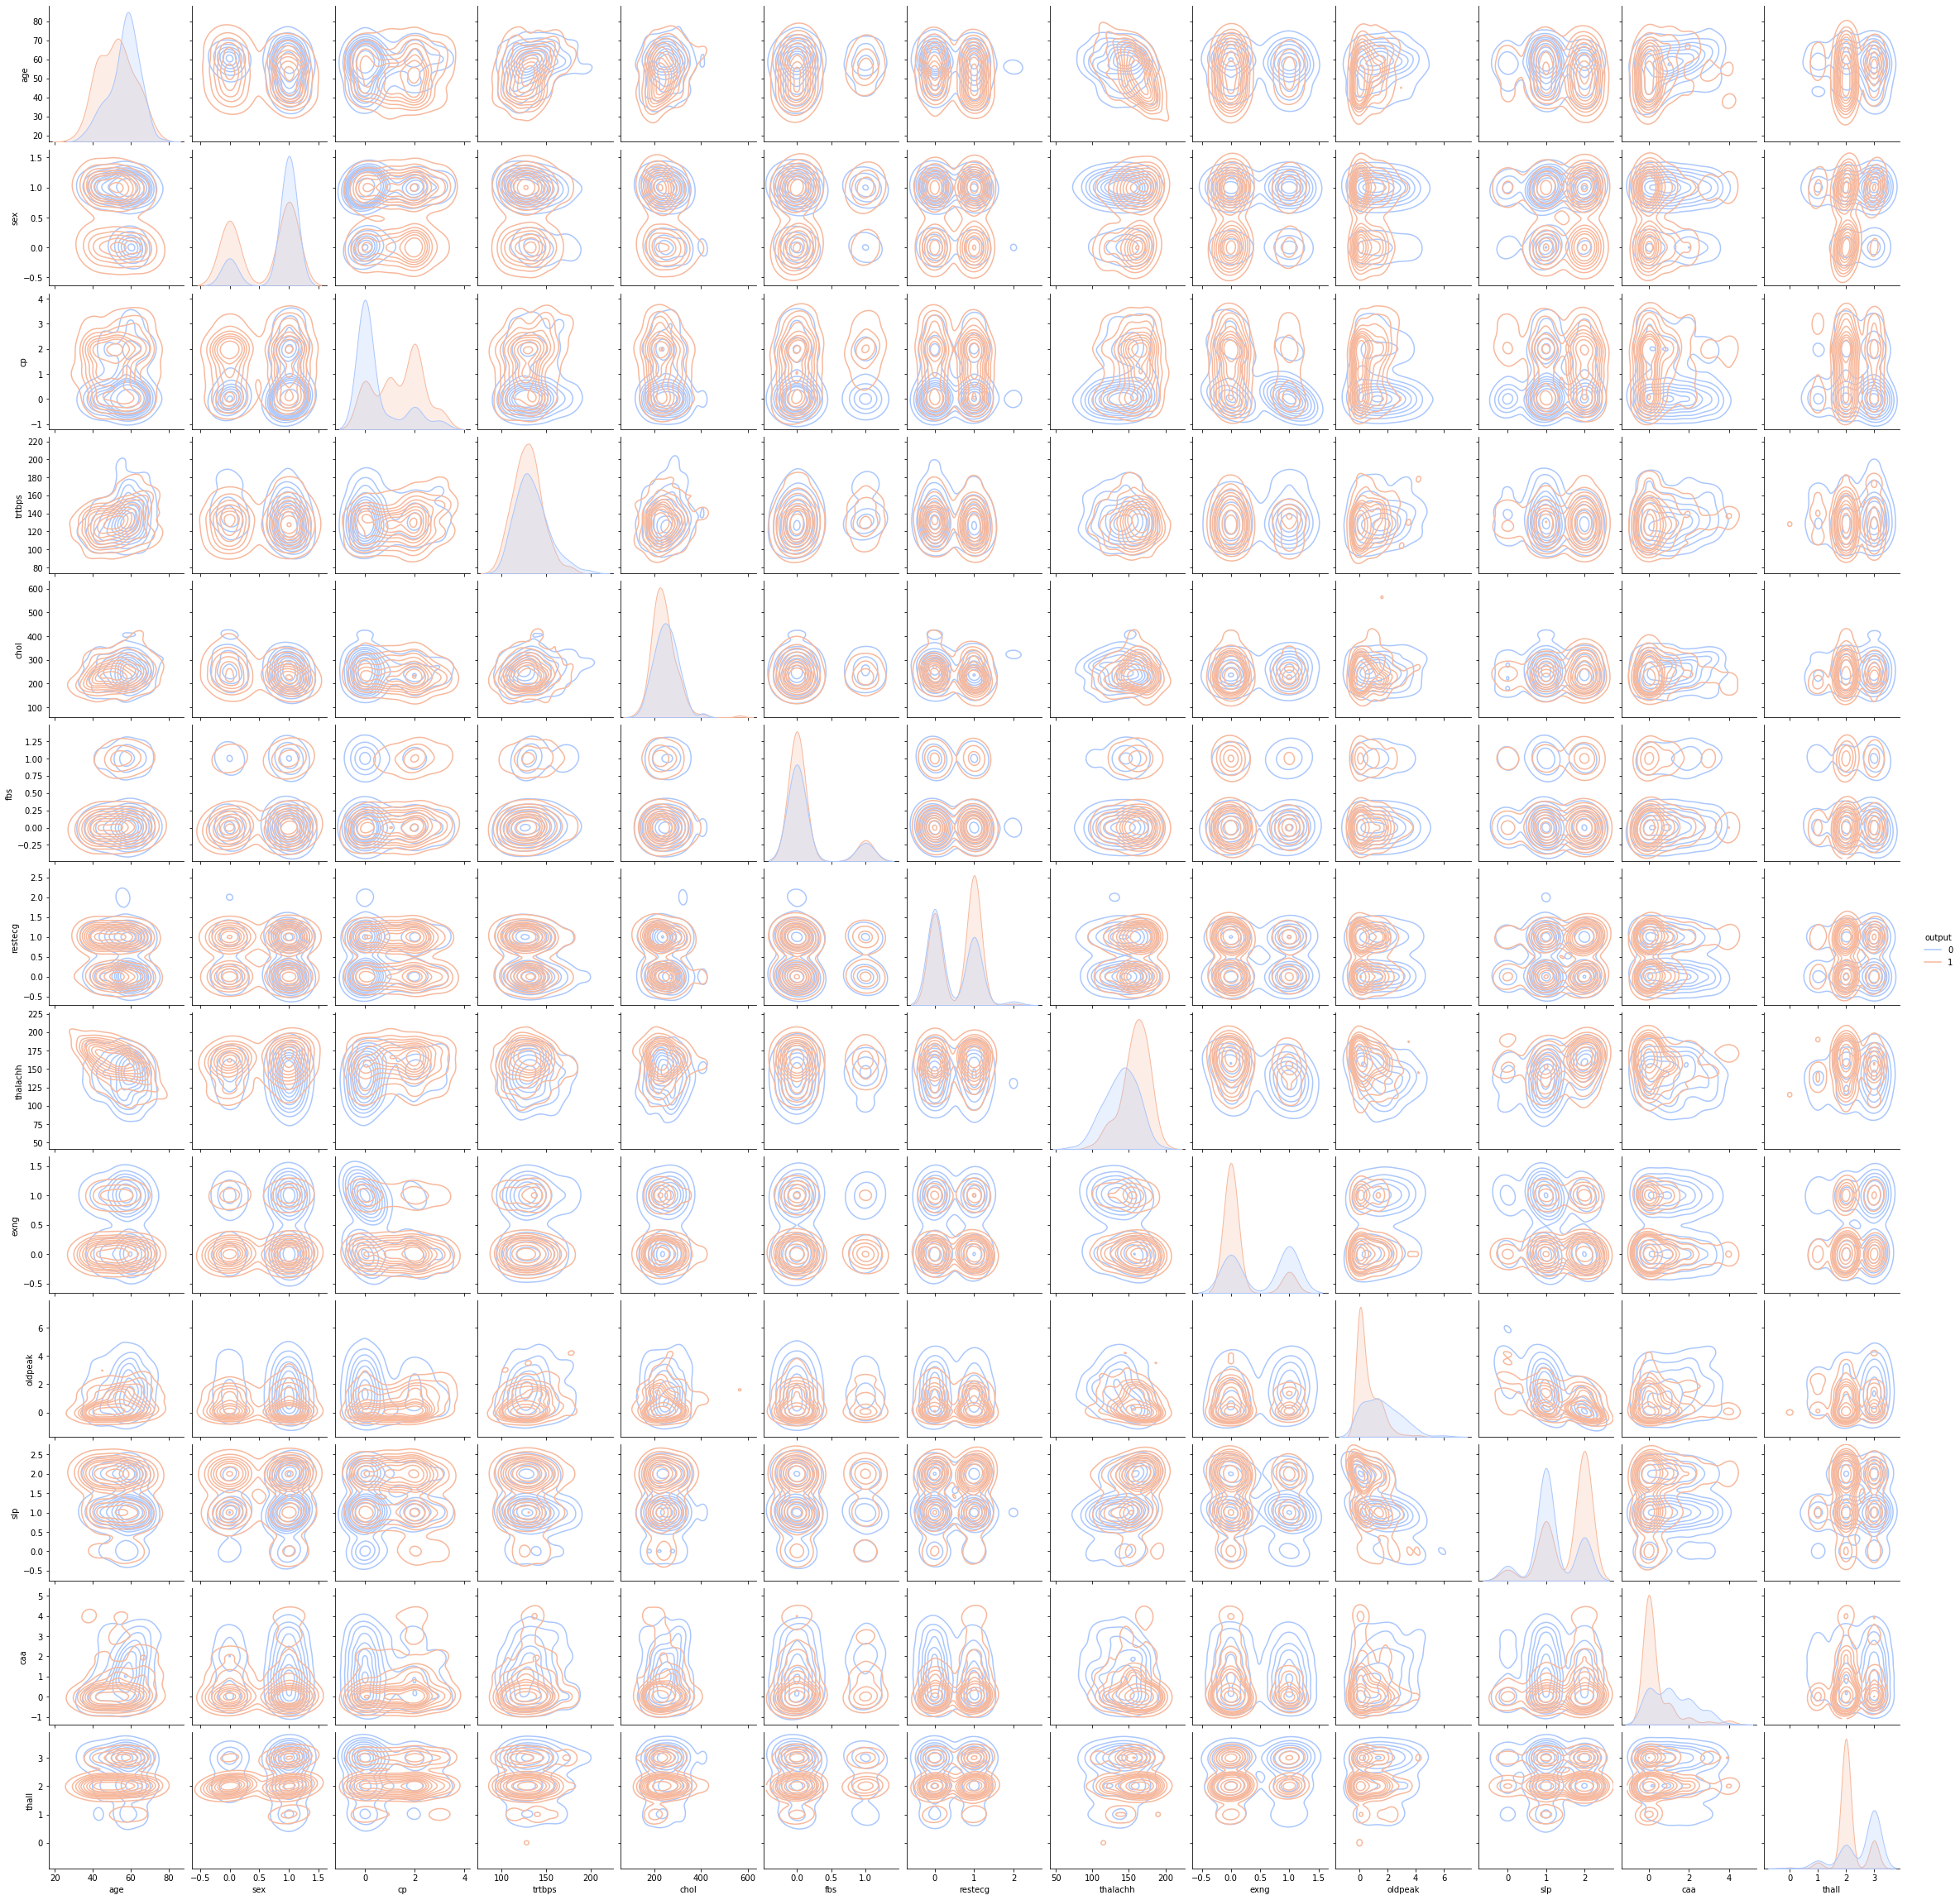

In [114]:
plt.figure(figsize=(20,20), dpi = 200)
sns.pairplot(df, kind="kde", hue="output", palette = 'coolwarm')

In [56]:
heart.isnull

<bound method DataFrame.isnull of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [57]:
heart[heart.duplicated()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [58]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os

In [59]:
heart.drop_duplicates(keep='first',inplace=True)

In [60]:
x = heart.iloc[:, 1:-1].values
y = heart.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

In [61]:
X=df.drop("output",axis=1)
y=df["output"]

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
X=pd.DataFrame(scaler.fit_transform(X))

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [65]:
from sklearn import metrics

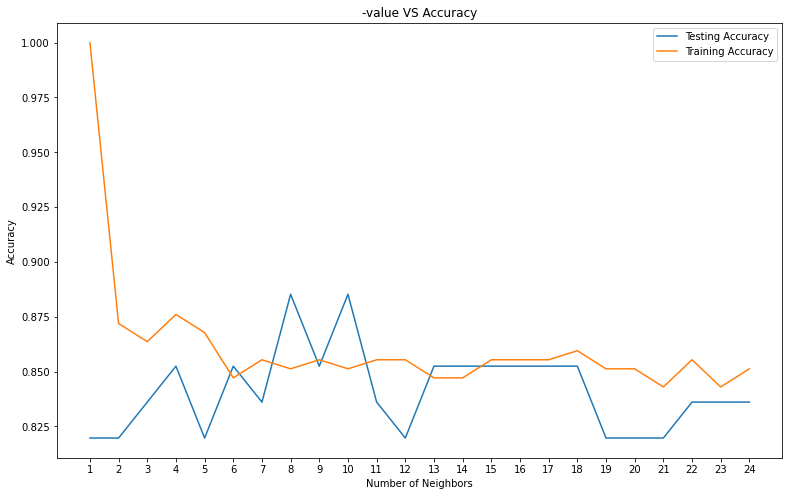

Best accuracy is 0.8852459016393442 with K = 8


In [66]:
# Model complexity
#knn
from sklearn.neighbors import KNeighborsClassifier
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("die Best accuracy ist {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [67]:
knn= KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train,y_train)
knnpred = knn.predict(X_test)
print(metrics.classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [68]:
from sklearn.model_selection import train_test_split

#random state değeri farklı veriyor, son split geçerlidir

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

In [70]:
tuned_parameters = [{'n_neighbors':[1,5], 'p':[ 1, 2,3]}]

clf = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))

Best parameters set found on train set:
{'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(p=1)

0.8688524590163934


In [71]:
# CV score für logReg
from sklearn.model_selection import cross_val_score
reg = LogisticRegression()
k = 5
cv_result = cross_val_score(reg,X,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [0.81967213 0.8852459  0.83606557 0.86666667 0.76666667]
CV scores average:  0.8348633879781422


In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
X_train, X_test

(array([[ 7.03062355e-02, -1.50674161e+00, -9.72271824e-01, ...,
         -6.56831327e-01, -6.90430518e-01, -4.97474232e-01],
        [-1.27291290e+00, -1.50674161e+00, -9.72271824e-01, ...,
         -6.56831327e-01, -6.90430518e-01,  1.15168692e+00],
        [-1.53563620e-01,  6.63683803e-01,  9.72271824e-01, ...,
          9.81861262e-01,  2.31108179e+00, -4.97474232e-01],
        ...,
        [-9.37108113e-01, -1.50674161e+00,  6.95123371e-18, ...,
          9.81861262e-01, -6.90430518e-01, -4.97474232e-01],
        [-1.49678275e+00,  6.63683803e-01, -9.72271824e-01, ...,
          9.81861262e-01, -6.90430518e-01,  1.15168692e+00],
        [ 5.18045946e-01,  6.63683803e-01, -9.72271824e-01, ...,
         -6.56831327e-01,  3.10073586e-01,  1.15168692e+00]]),
 array([[ 2.94176091e-01, -1.50674161e+00,  6.95123371e-18,
         -8.83137308e-02, -1.60548269e-01, -4.31595308e-01,
         -1.07963713e+00,  1.04791333e+00, -6.63683803e-01,
         -8.80593682e-01, -6.56831327e-01,  3.100

In [87]:
#Gaussian Naive Bayes vom letzte Semester

model = GaussianNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model ist : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  86.88524590163934 %


In [99]:
# VON letztes Semester Bernoulli NB
model = BernoulliNB()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Bernoulli Naive Bayes model ist : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Bernoulli Naive Bayes model is :  88.52459016393442 %


In [88]:
# klasssische SVC ()

model = SVC()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
print("The accuracy of SVC ist : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  85.24590163934425 %


In [89]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  86.88524590163934 %


In [91]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

[[23  7]
 [ 8 23]]
The accuracy of KNN is :  75.40983606557377 %


Text(0, 0.5, 'Error_Rate')

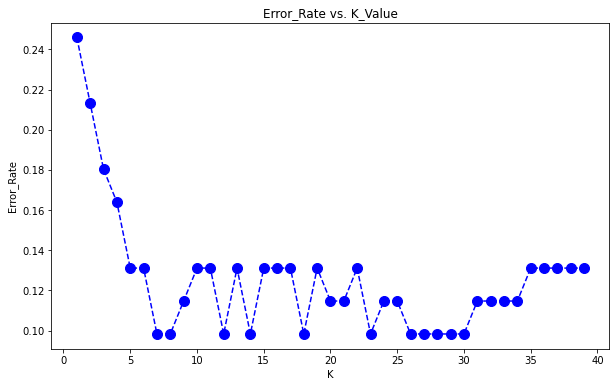

In [92]:
error_rate = []

for i in range(1, 40):
      
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='blue', markersize = 10)
  
plt.title('Error_Rate vs. K_Value')
plt.xlabel('K')
plt.ylabel('Error_Rate')

In [93]:
model = KNeighborsClassifier(n_neighbors = 7)
  
model.fit(X_train, y_train)
predicted = model.predict(X_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")

Confusion Matrix :
[[27  3]
 [ 3 28]]


The accuracy of KNN is :  90.1639344262295 %


In [115]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pre=ada.predict(X_test)
acc_ada = accuracy_score(y_test,ada_pre)
acc_ada

0.819672131147541

In [118]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()]
models = dict(zip(key,value))

In [119]:
predicted =[]

In [120]:
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8852459016393442
KNeighborsClassifier 0.8688524590163934
SVC 0.8524590163934426
DecisionTreeClassifier 0.8524590163934426
RandomForestClassifier 0.9016393442622951
GradientBoostingClassifier 0.8524590163934426


<AxesSubplot:>

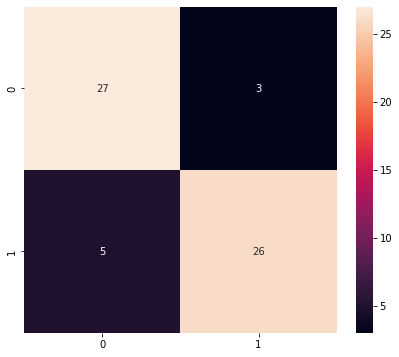

In [121]:
#confusion matrix
cnn=KNeighborsClassifier()
cnn.fit(X_train,y_train)
cnn_predict = cnn.predict(X_test)
cf_matrix=confusion_matrix(y_test,cnn_predict)
plt.figure(figsize=(7,6))
sns.heatmap(cf_matrix,annot=True,fmt='d')


<AxesSubplot:>

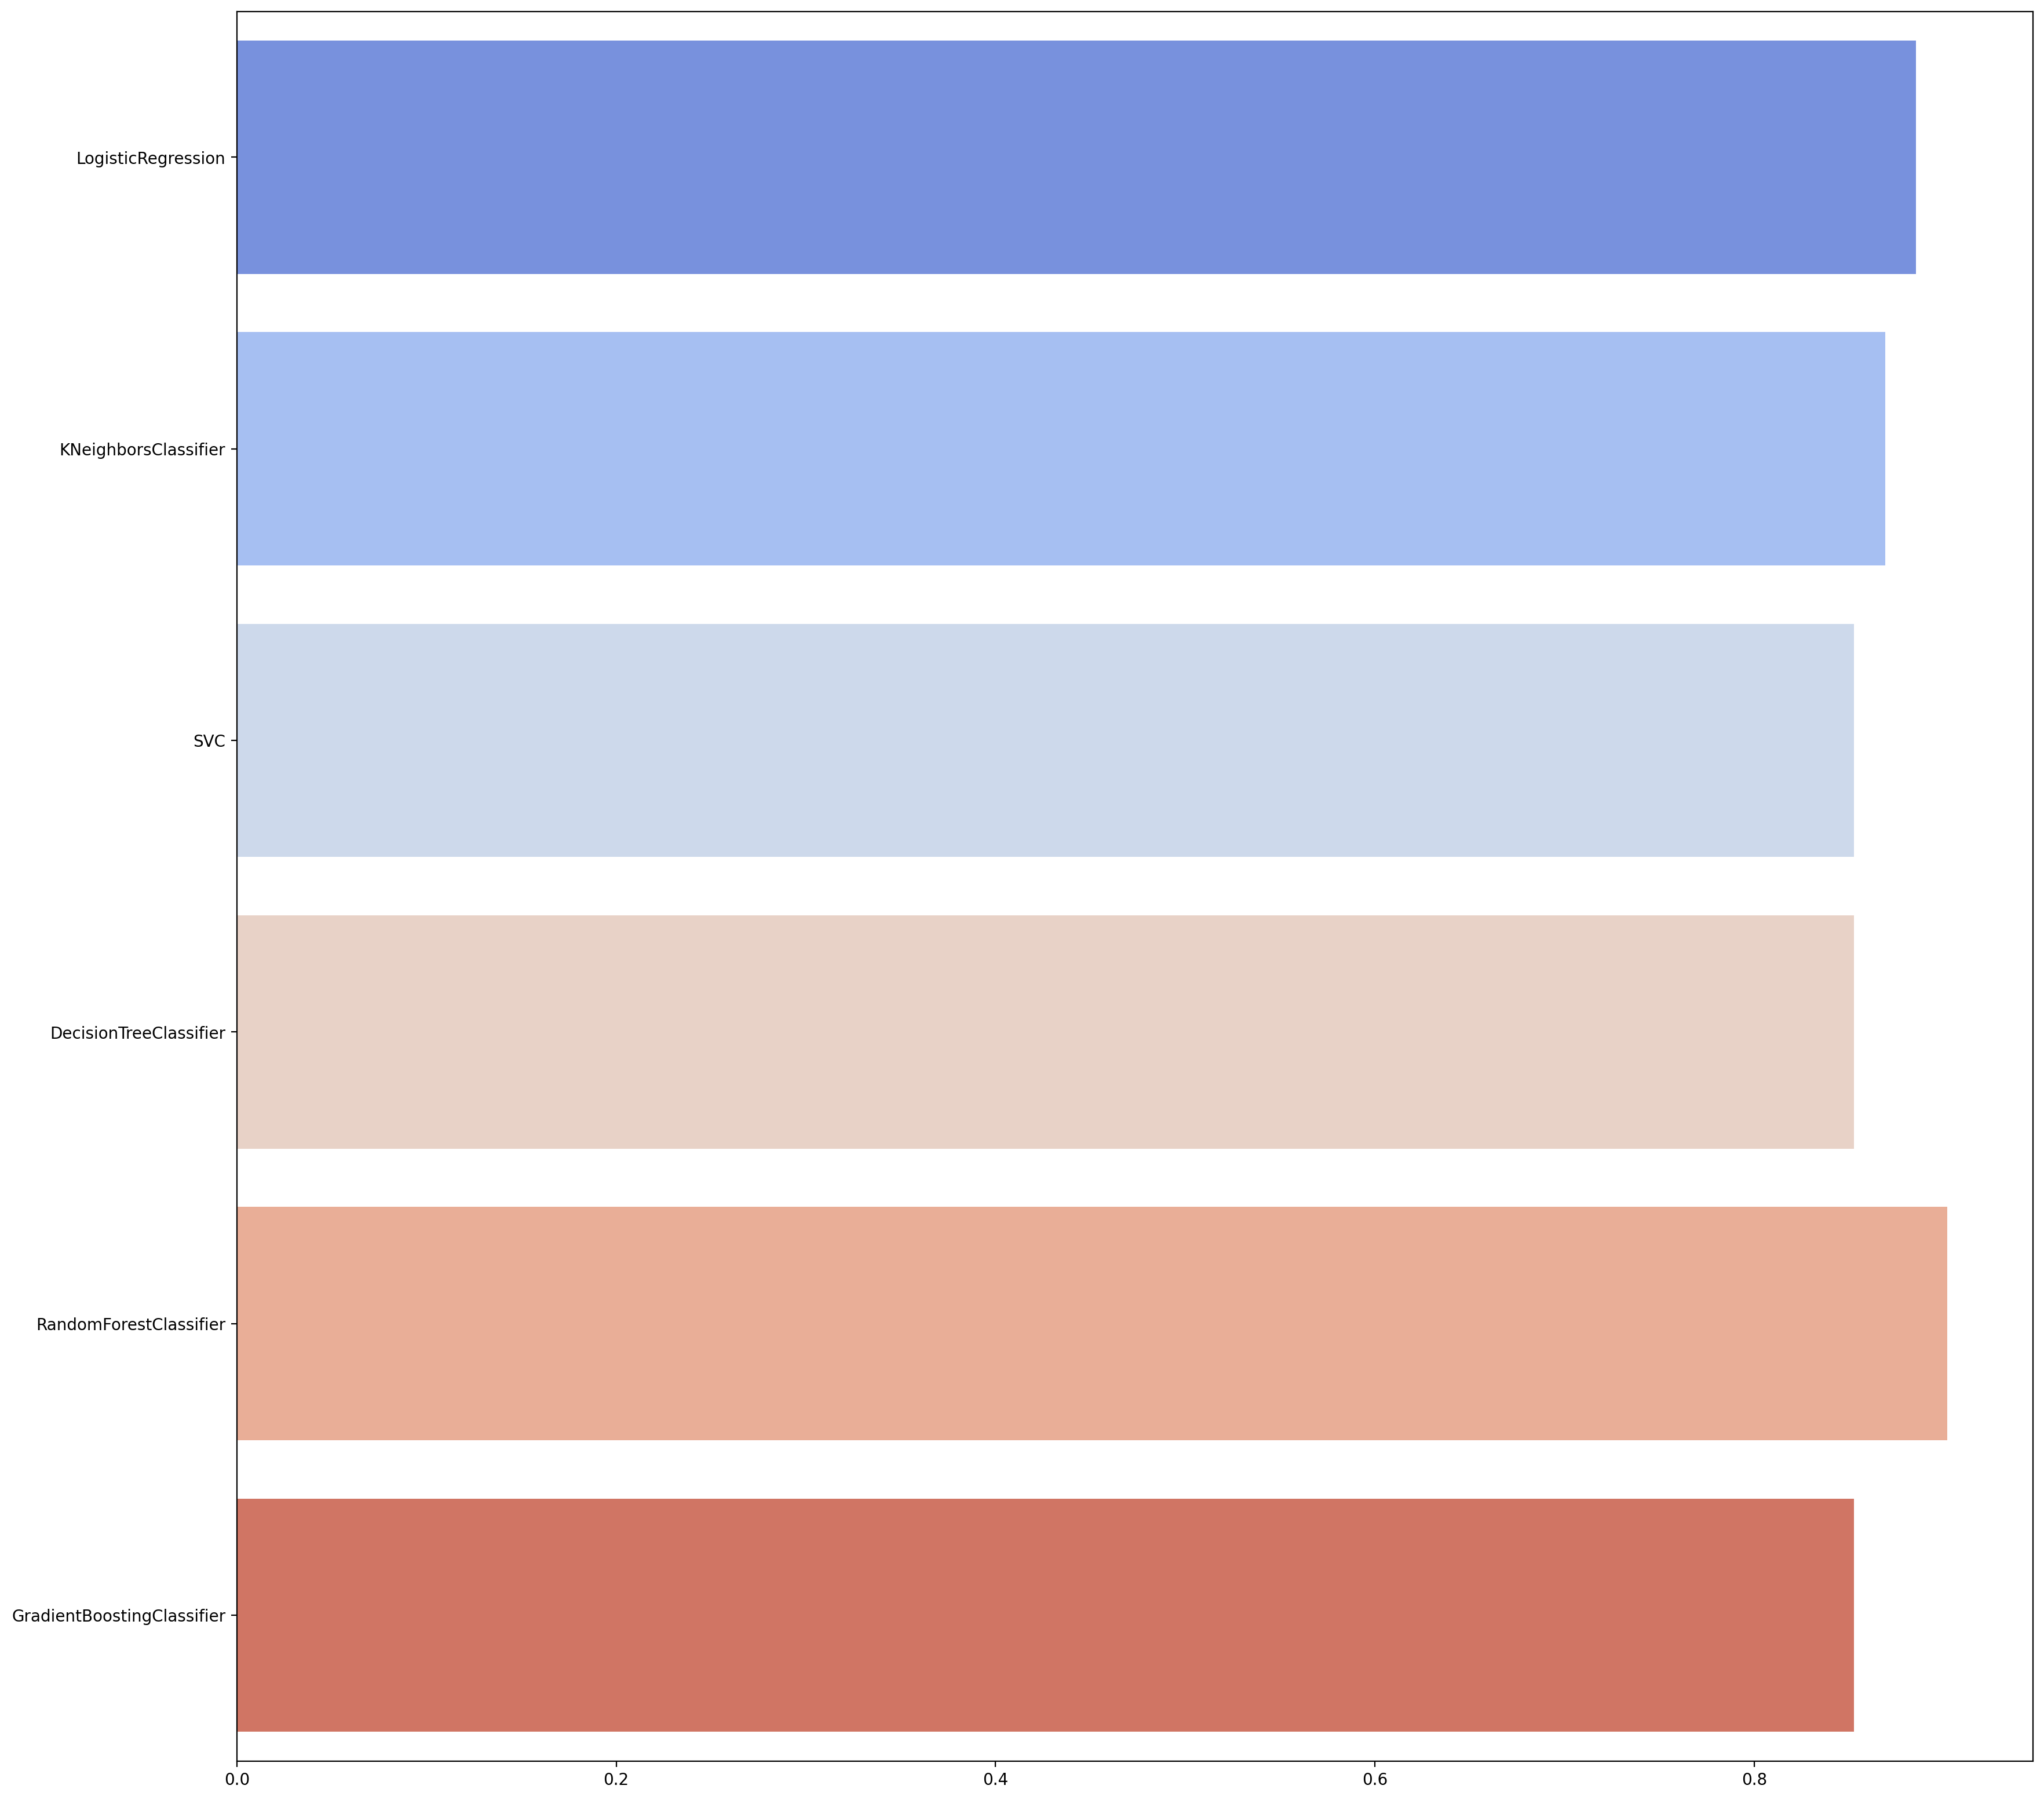

In [123]:
plt.figure(figsize = (20, 20), dpi = 200)
sns.barplot(x = predicted, y = key, palette='coolwarm')
